<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/logo_hse.png?raw=true" width="1000"></center>



<h1><center>Генеративные модели в машинном обучении, МОВС, ФКН ВШЭ</center></h1>

<h2><center>Домашнее задание 3: Диффузия, потоки</center></h2>

# Введение



До заголовка "Диффузионные модели" все по-старому. Только Задания 1-2 теперь неоцениваемые, ведь вы их уже делали

## MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - это система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ).



MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).



<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/magic1.jpg?raw=true" width="1000"></center>



Источник: https://magic.mpp.mpg.de/



Youtube video: https://youtu.be/mjcDSR2vSU8



    Ок, давайте зафиксируем. Какой-то крутой телескоп позволяет открыть новые виды излучения. Идем дальше.

## Частицы из космоса

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение.



    По фотографиям можно определить тип частицы из космоса: фотон или протон. Знакомая формулировка задачи, не правда ли?



<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/shower.jpg?raw=true" width="500"></center>

## Фотографии

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Ниже пример такой фотографии.



<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/geo.jpg?raw=true" width="400"></center>



    Итак, каждая фотография описывается набором параметров, которые за нас считает телесоп. А что там с двумя видами частиц?

## Фотоны vs адронов

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Получение каждого такого изображения - дорогое удовольствие!





<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/gamma_p.png?raw=true" width="600"></center>



Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов.



    Итак, давайте сэкономим денег для ученых и сгенерируем хороших фотографий разных частиц. Используем для этого GAN и диффузионные модели!

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

# Данные

Будем использовать данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):





0. Length: major axis of ellipse [mm]

1. Width: minor axis of ellipse [mm]

2. Size: 10-log of sum of content of all pixels [in #phot]

3. Conc: ratio of sum of two highest pixels over fSize [ratio]

4. Conc1: ratio of highest pixel over fSize [ratio]

5. Asym: distance from highest pixel to center, projected onto major axis [mm]

6. M3Long: 3rd root of third moment along major axis [mm]

7. M3Trans: 3rd root of third moment along minor axis [mm]

8. Alpha: angle of major axis with vector to origin [deg]

9. Dist: distance from origin to center of ellipse [mm]

10. class: g,h # gamma (signal), hadron (background)

In [2]:
# read data

names = np.array(

    [

        "Length",

        "Width",

        "Size",

        "Conc",

        "Conc1",

        "Asym",

        "M3Long",

        "M3Trans",

        "Alpha",

        "Dist",

        "class",

    ]

)

data = pd.read_csv("https://raw.githubusercontent.com/hushchyn-mikhail/gen_models_ai_hse/refs/heads/main/2024/homeworks/hw3/data/magic04.data", header=None)

data.columns = names

print(data.shape)

data.head()

(19020, 11)


,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Постановка задачи



Ваша задача заключается в том, чтобы с помощью генеративно-состязательных сетей научиться генерировать параметры кластеров на изображениях телескопа для каждого типа частиц (фотона или адрона):



- $X$ - матрица реальных объектов, которые нужно начиться генерировать;

- $y$ - метки классов, которые будем использовать как условие при генерации.

In [4]:
# параметры кластеров на изображениях

X = data[names[:-1]].values

X = np.abs(X)



# метки классов

labels = data[names[-1]].values

y = np.ones((len(labels), 1))

y[labels == "h"] = 0

In [4]:
# примеры

X[:2]

array([[2.87967e+01, 1.60021e+01, 2.64490e+00, 3.91800e-01, 1.98200e-01,
        2.77004e+01, 2.20110e+01, 8.20270e+00, 4.00920e+01, 8.18828e+01],
       [3.16036e+01, 1.17235e+01, 2.51850e+00, 5.30300e-01, 3.77300e-01,
        2.62722e+01, 2.38238e+01, 9.95740e+00, 6.36090e+00, 2.05261e+02]])

In [5]:
# примеры

y[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
# все возможные значения

np.unique(y)

array([0., 1.])

# Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распределения значений каждого параметра для каждого типа частиц.

In [25]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):

    plt.figure(figsize=(5 * 4, 5 * 2))

    for i in range(X1.shape[1]):

        plt.subplot(3, 4, i + 1)

        plt.grid()

        plt.hist(X1[:, i], bins=bins, alpha=0.3, label=label1, color="C4")

        plt.hist(X2[:, i], bins=bins, alpha=0.3, label=label2, color="C0")

        plt.xlabel(names[i], size=14)

        plt.legend(loc="best")

    plt.tight_layout()

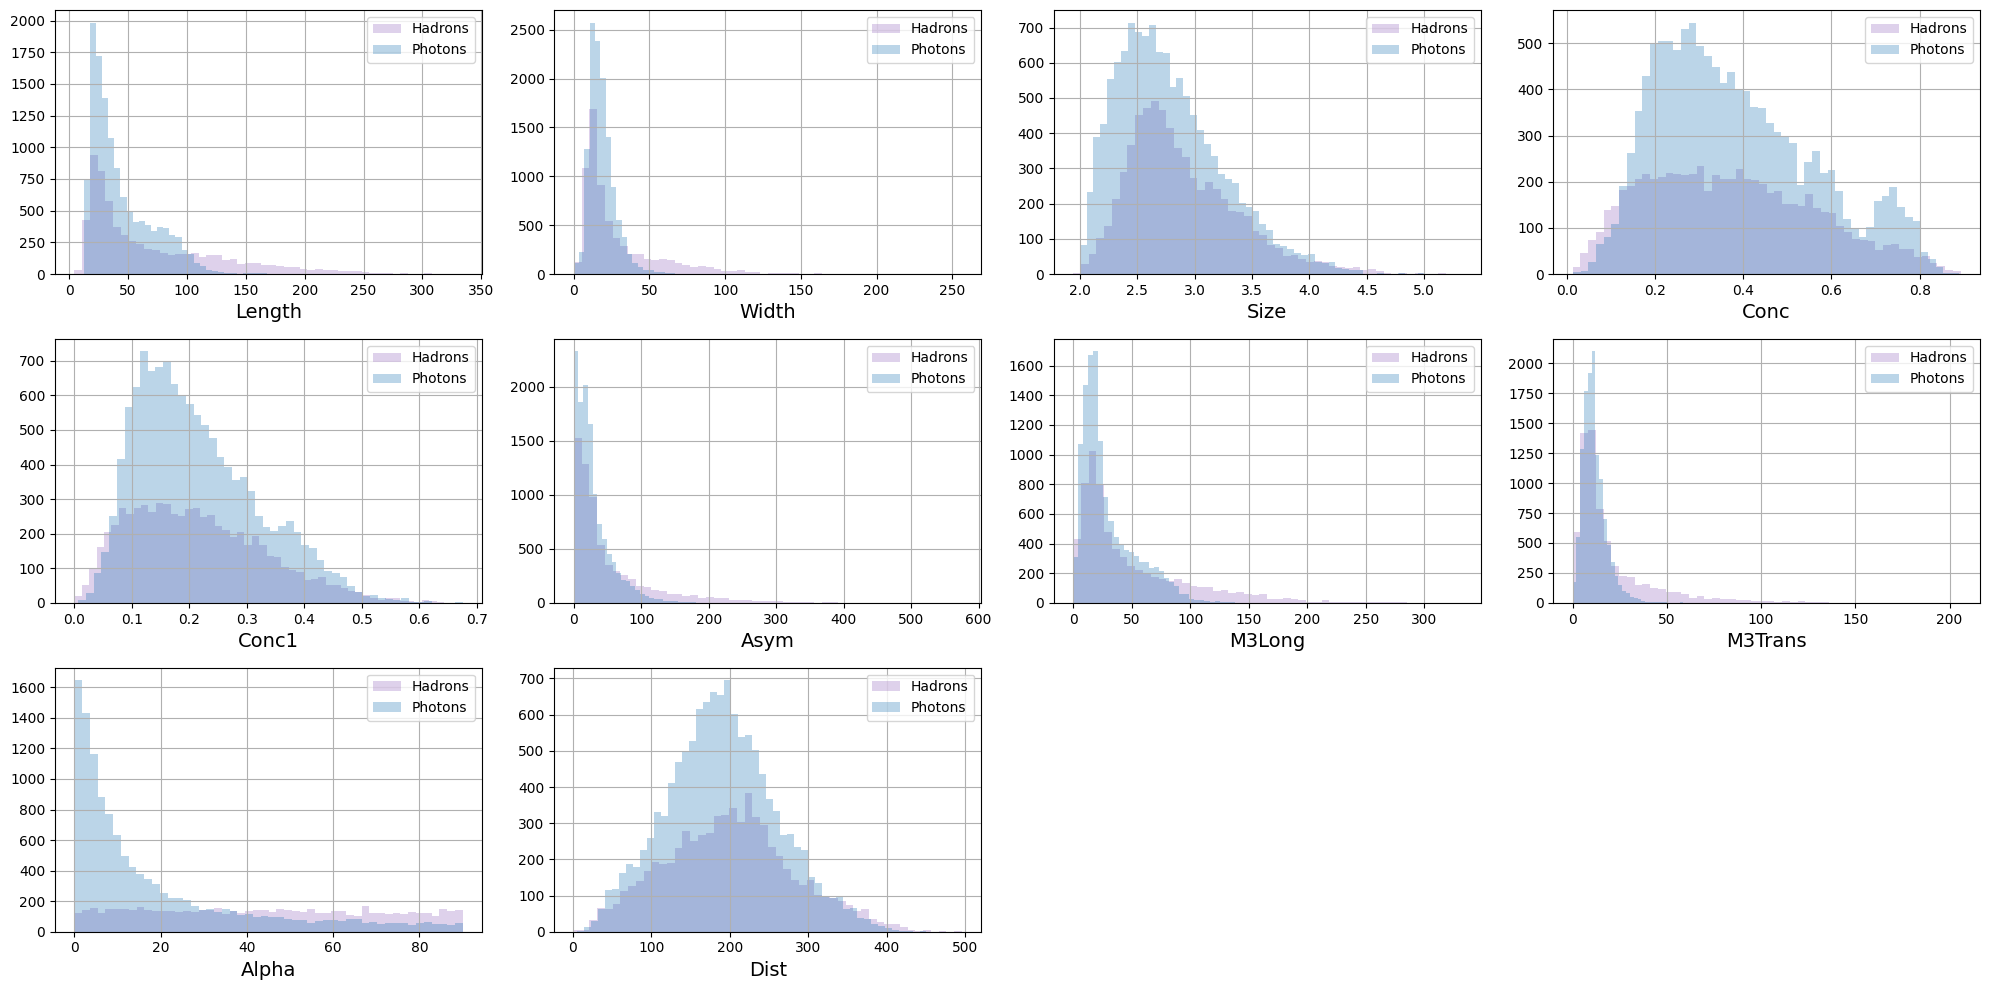

In [8]:
plot_hists(

    X[y[:, 0] == 0], X[y[:, 0] == 1], names, label1="Hadrons", label2="Photons", bins=50

)

# Предобработка данных

Из графика видим, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому нужно как-то преобразовать данные, чтобы убрать эти тяжелые хвосты.

# Обучающая и тестовая выборки

In [5]:
from sklearn.model_selection import train_test_split



# train / test split

X_train, X_test, y_train, y_test = train_test_split(

    X, y, stratify = y, test_size=0.5, shuffle = True, random_state = 11

)

## Задание 1 (0 баллов)



Проиллюстрируйте распределение y внутри train и test выборки.

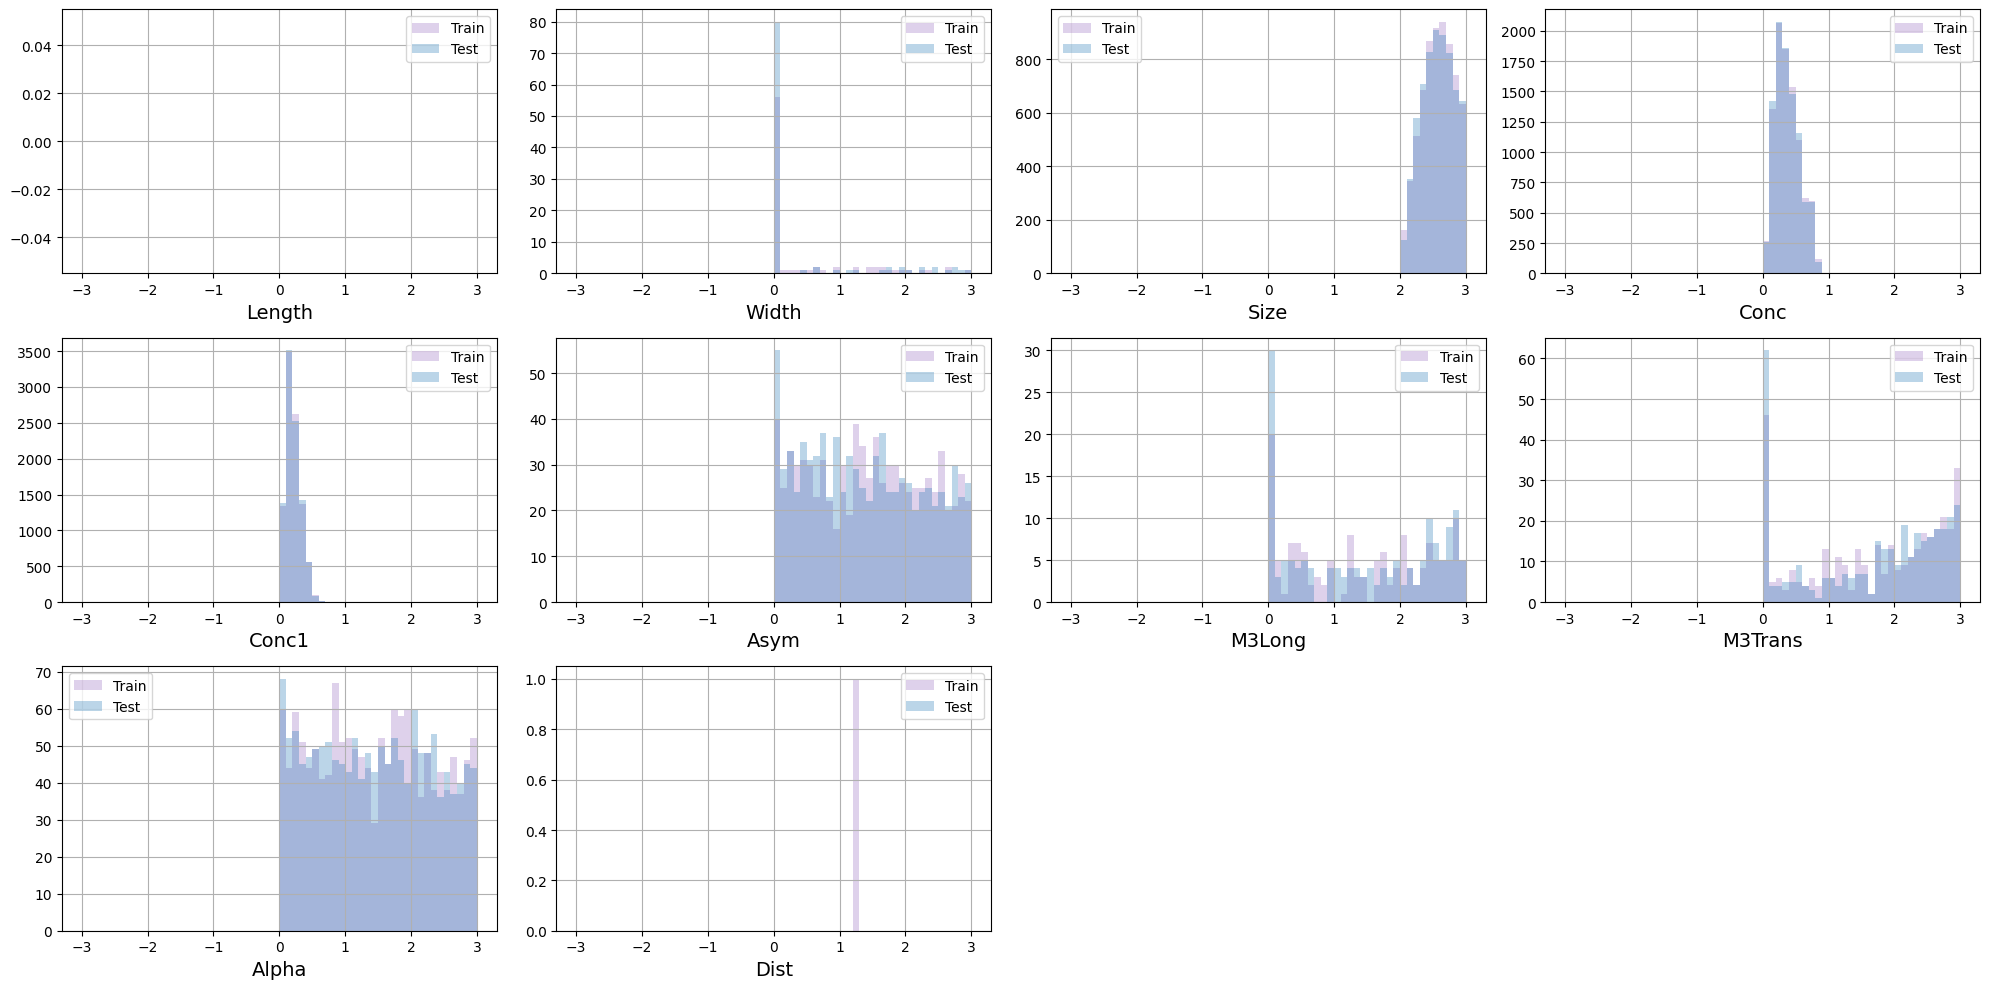

In [10]:
# your code below

plot_hists(X_train, X_test, names, label1="Train", label2="Test")


## Задание 2 (0 баллов)



Используя функцию `sklearn.preprocessing.QuantileTransformer` трансформируйте входные данные `X_train` и `X_test`. Это преобразование делает так, чтобы распределение каждого параметра было нормальным. Описание функции доступно по [ссылке](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html). Используйте значение параметра `output_distribution='normal'`.

In [6]:
### YOUR CODE IS HERE ######

from sklearn.preprocessing import QuantileTransformer



qt = QuantileTransformer(output_distribution='normal')

X_train = qt.fit_transform(X_train)

X_test = qt.transform(X_test)

### THE END OF YOUR CODE ###

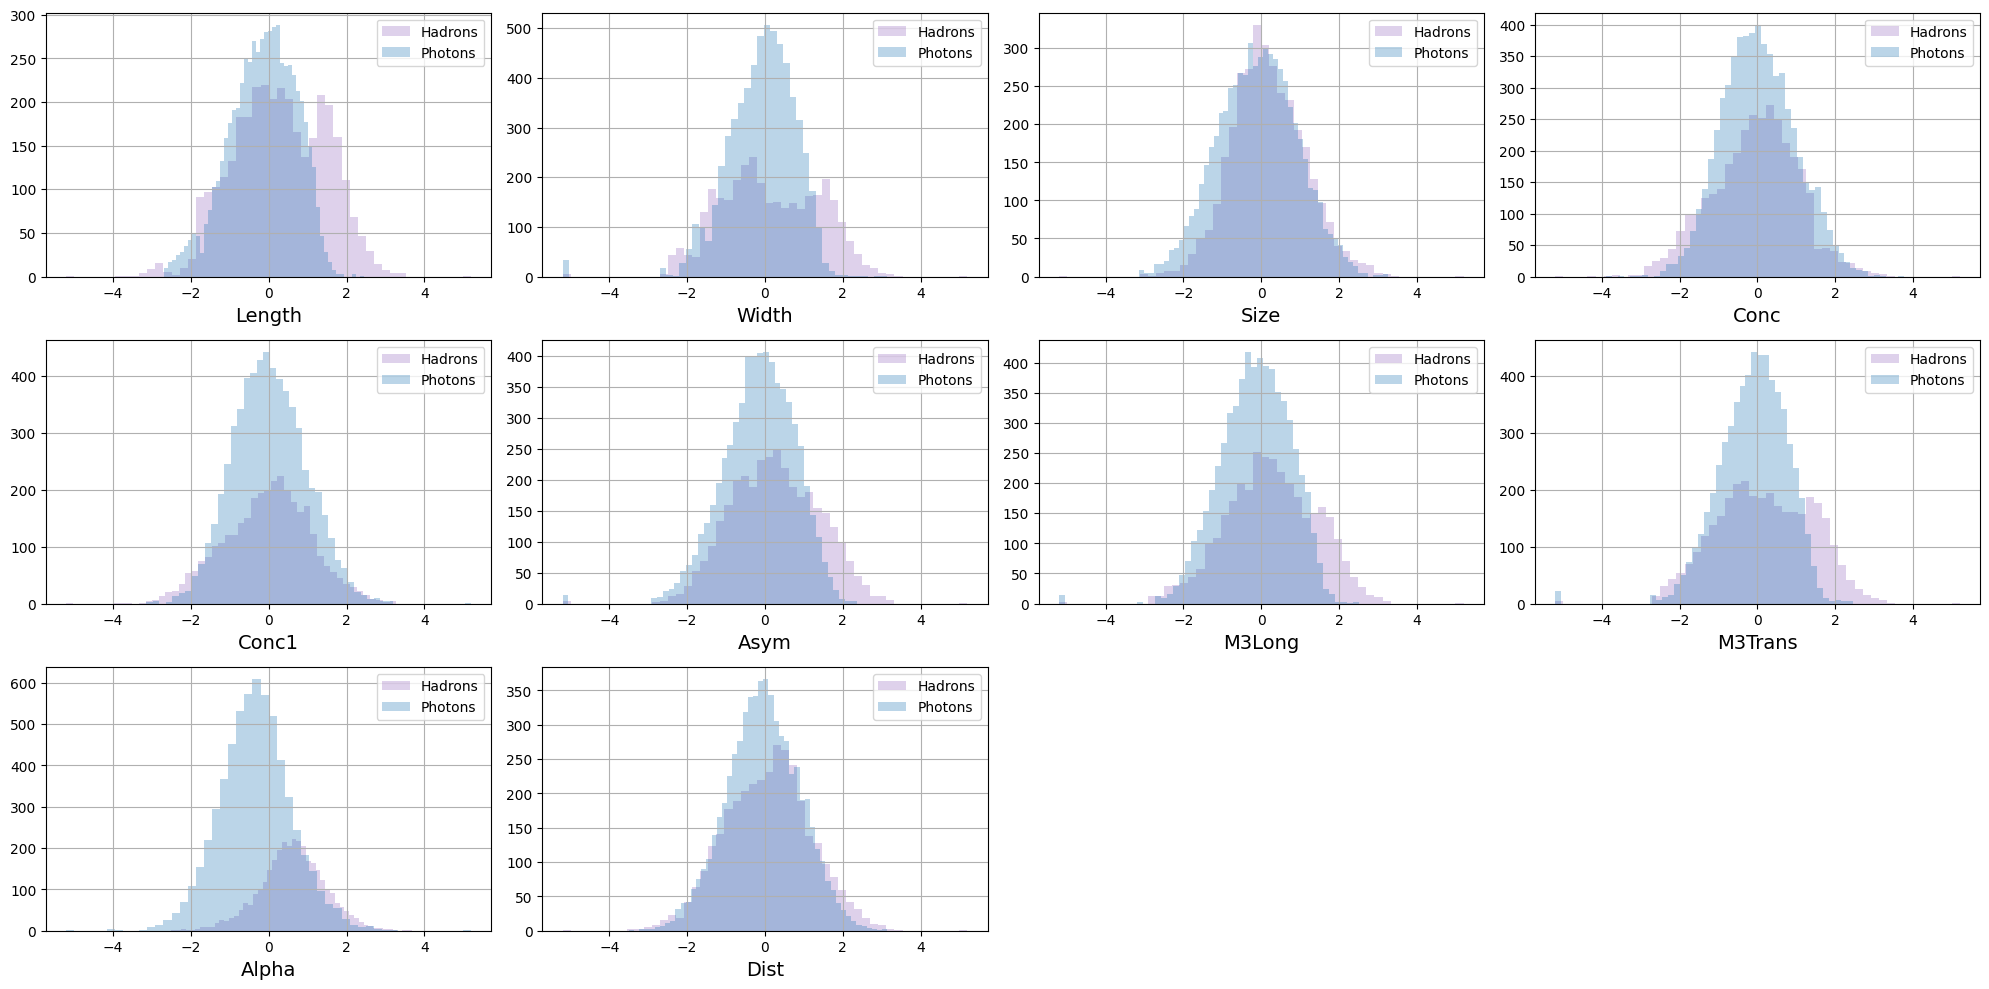

In [12]:
plot_hists(

    X_train[y_train[:, 0] == 0],

    X_train[y_train[:, 0] == 1],

    names,

    label1="Hadrons",

    label2="Photons",

    bins=50,

)

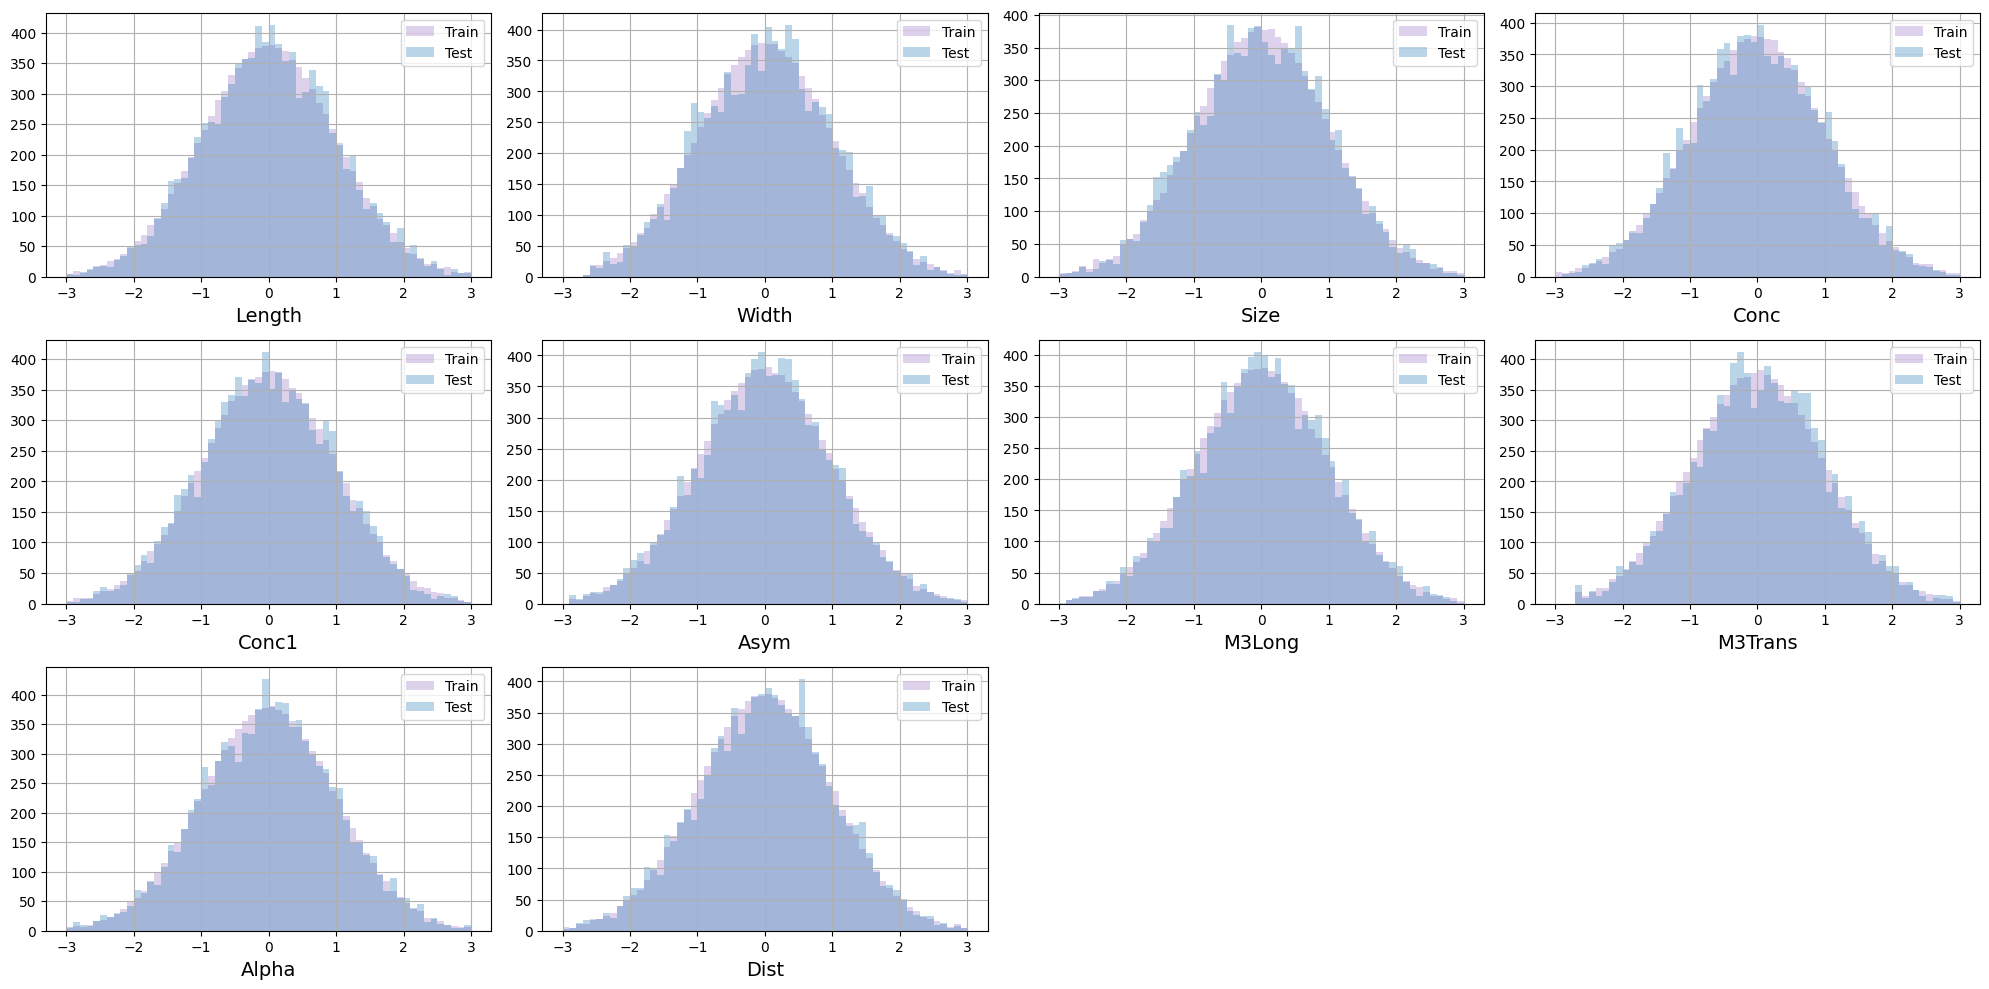

In [13]:
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

# Диффузионные модели (4 балла)



Проведем, по большому счету, такой же эксперимент, как в ДЗ-2, с диффузионной моделью.

In [7]:
import torch

import torch.nn as nn

import torch.nn.functional as F

from torch.autograd import Variable

from torch.utils.data import DataLoader, TensorDataset



DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Задание 3 (0.5 балла)



Реализуйте фукнцию из семинара для зашумления данных, адаптировав ее под наш тип данных.

In [15]:
def corrupt(x, amount):

    ### YOUR CODE IS HERE ######

    noise = torch.rand_like(x)

    amount = amount.view(-1, 1)

    x = x * (1-amount) + noise * amount

    ### THE END OF YOUR CODE ###

    return x

Добавим sсheduler, он пригодится вам при обучении модели.



*Советуем вниматиельно почитать доку по шедулеру.*

In [8]:
from diffusers import DDPMScheduler

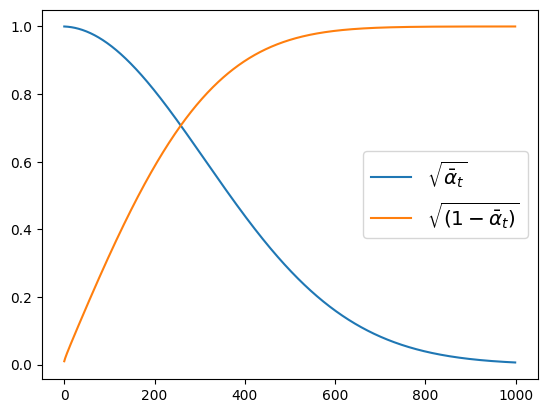

In [80]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, clip_sample=False)

plt.plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")

plt.plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")

plt.legend(fontsize="x-large")

In [18]:
noise_scheduler.timesteps

tensor([999, 998, 997, 996, 995, 994, 993, 992, 991, 990, 989, 988, 987, 986,
        985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974, 973, 972,
        971, 970, 969, 968, 967, 966, 965, 964, 963, 962, 961, 960, 959, 958,
        957, 956, 955, 954, 953, 952, 951, 950, 949, 948, 947, 946, 945, 944,
        943, 942, 941, 940, 939, 938, 937, 936, 935, 934, 933, 932, 931, 930,
        929, 928, 927, 926, 925, 924, 923, 922, 921, 920, 919, 918, 917, 916,
        915, 914, 913, 912, 911, 910, 909, 908, 907, 906, 905, 904, 903, 902,
        901, 900, 899, 898, 897, 896, 895, 894, 893, 892, 891, 890, 889, 888,
        887, 886, 885, 884, 883, 882, 881, 880, 879, 878, 877, 876, 875, 874,
        873, 872, 871, 870, 869, 868, 867, 866, 865, 864, 863, 862, 861, 860,
        859, 858, 857, 856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846,
        845, 844, 843, 842, 841, 840, 839, 838, 837, 836, 835, 834, 833, 832,
        831, 830, 829, 828, 827, 826, 825, 824, 823, 822, 821, 8

## Задание 4 (0.5 балла)



Реализуйте нейронную сеть. В качетсве архитектуры можете взять модель генератора. В процессе экспериментов попробуйте изменять архитектуру модели для улучшения качества сгенерированных объектов (Кстати, как вы будете качество измерять?).



- Полносвязный слой со 100 нейронами;

- Слой батч-нормализации;

- ReLU функцию активации;

- Полносвязный слой со 100 нейронами;

- Слой батч-нормализации;

- ReLU функцию активации;

- Выходной слой.

In [215]:
class DiffusionGenerator(nn.Module):

    def __init__(self, n_inputs, n_outputs):

        super(DiffusionGenerator, self).__init__()



        # Архитектура модели (поставил побольше нейронов)

        self.fc1 = nn.Linear(n_inputs, 256)

        self.bn1 = nn.BatchNorm1d(256)

        self.fc2 = nn.Linear(256, 256)

        self.bn2 = nn.BatchNorm1d(256)

        self.fc3 = nn.Linear(256, n_outputs)



    def forward(self, z, y, t):

        # Вставляем временной шаг t как дополнительную переменную

        t = t.unsqueeze(1)

        # Конкатенируем шум z, условие y и временной шаг t

        zyt = torch.cat((z, y, t), dim=1)

        # Проходим через сеть

        x = F.relu(self.bn1(self.fc1(zyt)))

        x = F.relu(self.bn2(self.fc2(x)))

        x = self.fc3(x)  # Здесь не применяем активацию, т.к. это выходные данные



        return x


## Задание 5 (0.5 балла)



Напишите функцию для генерации нового объекта с помощью обученной модели.

In [216]:
def generate_with_diffusion(model, y, latent_dim, scheduler):

    # Генерируем случайный шум

    z = torch.randn(y.shape[0], latent_dim).to(DEVICE)

    y = torch.tensor(y, dtype=torch.float, device=DEVICE)



    # Проходим через все временные шаги в обратном порядке

    for t in scheduler.timesteps:

        with torch.no_grad():

            t_tensor = torch.full((len(z),), t, dtype=torch.long).to(DEVICE)

            # Предсказание резидуала шума для текущего t

            residual = model(z, y, t_tensor)

            # Обновляем сэмпл с учетом текущего t

            z = scheduler.step(residual, t, z).prev_sample



    return z.cpu().numpy()


In [59]:
torch.randint(0, 999, (X_train.shape[0],)).long().unsqueeze(0).shape

torch.Size([1, 9510])

In [63]:
torch.randn(y_train.shape[0], 10).shape

torch.Size([9510, 10])

## Задание 6 (2 балла)



Напишите класс обучения диффузионной модели и обучите модель, после чего опишите полученные результаты. В качестве подсказки - опирайтесь на семинар по диффузионным моделям. Вы можете изменять некоторые части кода для вашего удобства, но оставляйте в таком случаи комментарии, пожалуйста.

In [214]:
# Агентский скор)

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score



def other_agent_score(X_real, y_real, X_fake, y_fake):

    X = np.concatenate((X_real, X_fake), axis=0)

    y = np.concatenate((y_real, y_fake), axis=0)



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)



    reg = LogisticRegression()

    reg.fit(X_train, y_train)

    reg_pred = reg.predict(X_test)



    lin_reg_score = accuracy_score(reg_pred, y_test)



    return lin_reg_score

In [217]:
class DiffusionFitter(object):

    def __init__(

        self,

        model,

        batch_size=32,

        n_epochs=10,

        latent_dim=1,

        lr=0.0001,

        n_critic=5,

    ):

        self.model = model

        self.batch_size = batch_size

        self.n_epochs = n_epochs

        self.latent_dim = latent_dim

        self.lr = lr

        self.n_critic = n_critic



        # Оптимизатор

        self.opt_gen = torch.optim.Adam(self.model.parameters(), lr=self.lr)





        self.model.to(DEVICE)



    def fit(self, X, y, noise_scheduler):

        # Преобразование данных в тензоры

        X_real = torch.tensor(X, dtype=torch.float32, device=DEVICE)

        y_cond = torch.tensor(y, dtype=torch.float32, device=DEVICE)



        # Создаем датасет и загружаем данные

        dataset_real = TensorDataset(X_real, y_cond)

        dataloader_real = DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)



        # Устанавливаем режим обучения

        self.model.train()



        # История потерь

        self.loss_history = []



        # Функция потерь

        loss_fn = nn.MSELoss()



        # Основной цикл обучения

        for epoch in range(self.n_epochs):

            loss_epoch = 0

            count = 0



            for real_batch, cond_batch in dataloader_real:

                # Шум и временные шаги

                noise = torch.randn_like(real_batch)

                timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (real_batch.shape[0],)).long().to(DEVICE)

                noisy_real = noise_scheduler.add_noise(real_batch, noise, timesteps)



                # Предсказание модели

                pred_noise = self.model(noisy_real, cond_batch, timesteps)



                # Вычисляем потерю между предсказанным и истинным шумом

                loss = loss_fn(pred_noise, noise)



                # Обновление весов модели

                self.opt_gen.zero_grad()

                loss.backward()

                self.opt_gen.step()



                loss_epoch += loss.item()

                count += 1



            avg_loss = loss_epoch / count

            self.loss_history.append(avg_loss)

            print(f"Epoch {epoch + 1}/{self.n_epochs}, Loss: {avg_loss}")



            # Создайте выборку из 1000 объектов из X_train и 1000 сгенерированных объектов

            # И запустите работу фукнции other_agent_score

            # Генерация сэмплов для оценки каждые 2 эпохи

            if (epoch + 1) % 5 == 0:

                self.model.eval()



                # Выборка 1000 объектов и условий из текущей эпохи

                if len(real_batch) >= 1000:

                    sampled_indices = torch.randint(0, len(real_batch), (1000,))

                    real_sample = real_batch[sampled_indices]

                    cond_sample = cond_batch[sampled_indices]

                else:

                    real_sample = real_batch

                    cond_sample = cond_batch



                # Генерируем 1000 сэмплов

                X_fake = generate_with_diffusion(

                    model = self.model,

                    y = cond_sample,

                    latent_dim = self.latent_dim,

                    scheduler= noise_scheduler

                    )



                # Вызываем функцию оценки other_agent_score

                score = other_agent_score(

                    X_real = real_sample,

                    y_real = np.ones(len(real_sample)),

                    X_fake = X_fake,

                    y_fake = np.zeros(len(X_fake))

                    )



                print(f"Epoch {epoch + 1}/{self.n_epochs}, Loss: {loss_epoch:.4f}, other_agent_score: {score:.4f}")



        # Завершаем обучение

        self.model.eval()


In [95]:
import warnings



warnings.filterwarnings("ignore")




In [218]:
%%time

# Устройство (GPU или CPU)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Параметры модели

latent_dim = 10

n_inputs = latent_dim + y_train.shape[1] + 1  # Размерность шума + условные метки + время t

n_outputs = X_train.shape[1]  # Размерность выхода модели



# Создание модели

model = DiffusionGenerator(n_inputs=n_inputs, n_outputs=n_outputs)



# Создание шедулера (DDPMScheduler)

noise_scheduler = DDPMScheduler(num_train_timesteps=1000, clip_sample=False)



# Создание фиттера

diffusionFitter = DiffusionFitter(

    model=model,

    batch_size=64,

    n_epochs=100,

    latent_dim=latent_dim,

    lr=0.0001

)



# Обучение диффузионной модели

diffusionFitter.fit(X_train, y_train, noise_scheduler)


Epoch 1/100, Loss: 0.8427210986214196
Epoch 2/100, Loss: 0.5425939297916105
Epoch 3/100, Loss: 0.40914604047800873
Epoch 4/100, Loss: 0.3568710668775059
Epoch 5/100, Loss: 0.3242539752449765
Epoch 5/100, Loss: 48.3138, other_agent_score: 0.6087
Epoch 6/100, Loss: 0.2642645109819886
Epoch 7/100, Loss: 0.24338492851129315
Epoch 8/100, Loss: 0.23432430754971983
Epoch 9/100, Loss: 0.2247552483673864
Epoch 10/100, Loss: 0.22610380665567897
Epoch 10/100, Loss: 33.6895, other_agent_score: 0.6957
Epoch 11/100, Loss: 0.2252254713601714
Epoch 12/100, Loss: 0.2184264490868421
Epoch 13/100, Loss: 0.2263515264595915
Epoch 14/100, Loss: 0.22044095877032951
Epoch 15/100, Loss: 0.21690151210399283
Epoch 15/100, Loss: 32.3183, other_agent_score: 0.4783
Epoch 16/100, Loss: 0.22038035739788273
Epoch 17/100, Loss: 0.21889710176311084
Epoch 18/100, Loss: 0.2137715810497335
Epoch 19/100, Loss: 0.211194036590973
Epoch 20/100, Loss: 0.21667627050172564
Epoch 20/100, Loss: 32.2848, other_agent_score: 0.4783
Ep

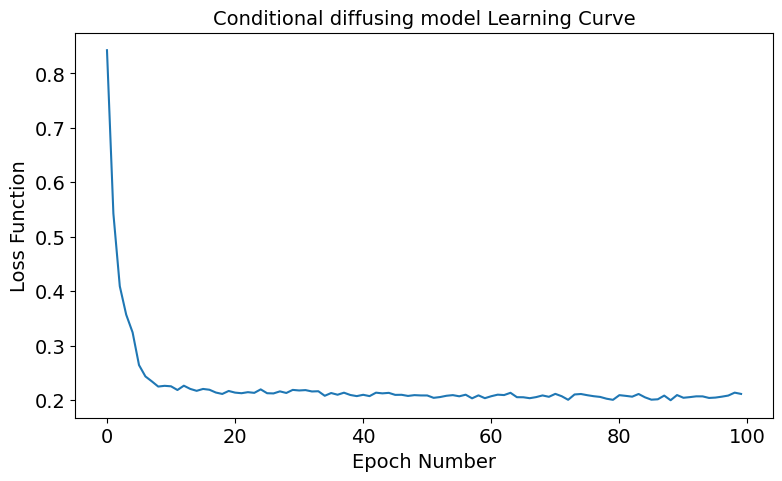

In [219]:
# diffusion learning curve

plt.figure(figsize=(9, 5))

plt.plot(diffusionFitter.loss_history)

plt.xlabel("Epoch Number", size=14)

plt.ylabel("Loss Function", size=14)

plt.xticks(size=14)

plt.yticks(size=14)

plt.title("Conditional diffusing model Learning Curve", size=14)

#plt.grid(b=1, linestyle="--", linewidth=0.5, color="0.5")

plt.show()

## Задание 7 (0.5 балла)

По аналогии с прошлым экспериментом (из ДЗ-2) с GAN моделью сгенерируйте выборку фейковых объектов, равную размеру тестовой выборки, и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с сWGAN моделью?

In [220]:
X_fake_train = generate_with_diffusion(diffusionFitter.model, y_train, latent_dim, noise_scheduler)

X_fake_test = generate_with_diffusion(diffusionFitter.model, y_test, latent_dim, noise_scheduler)

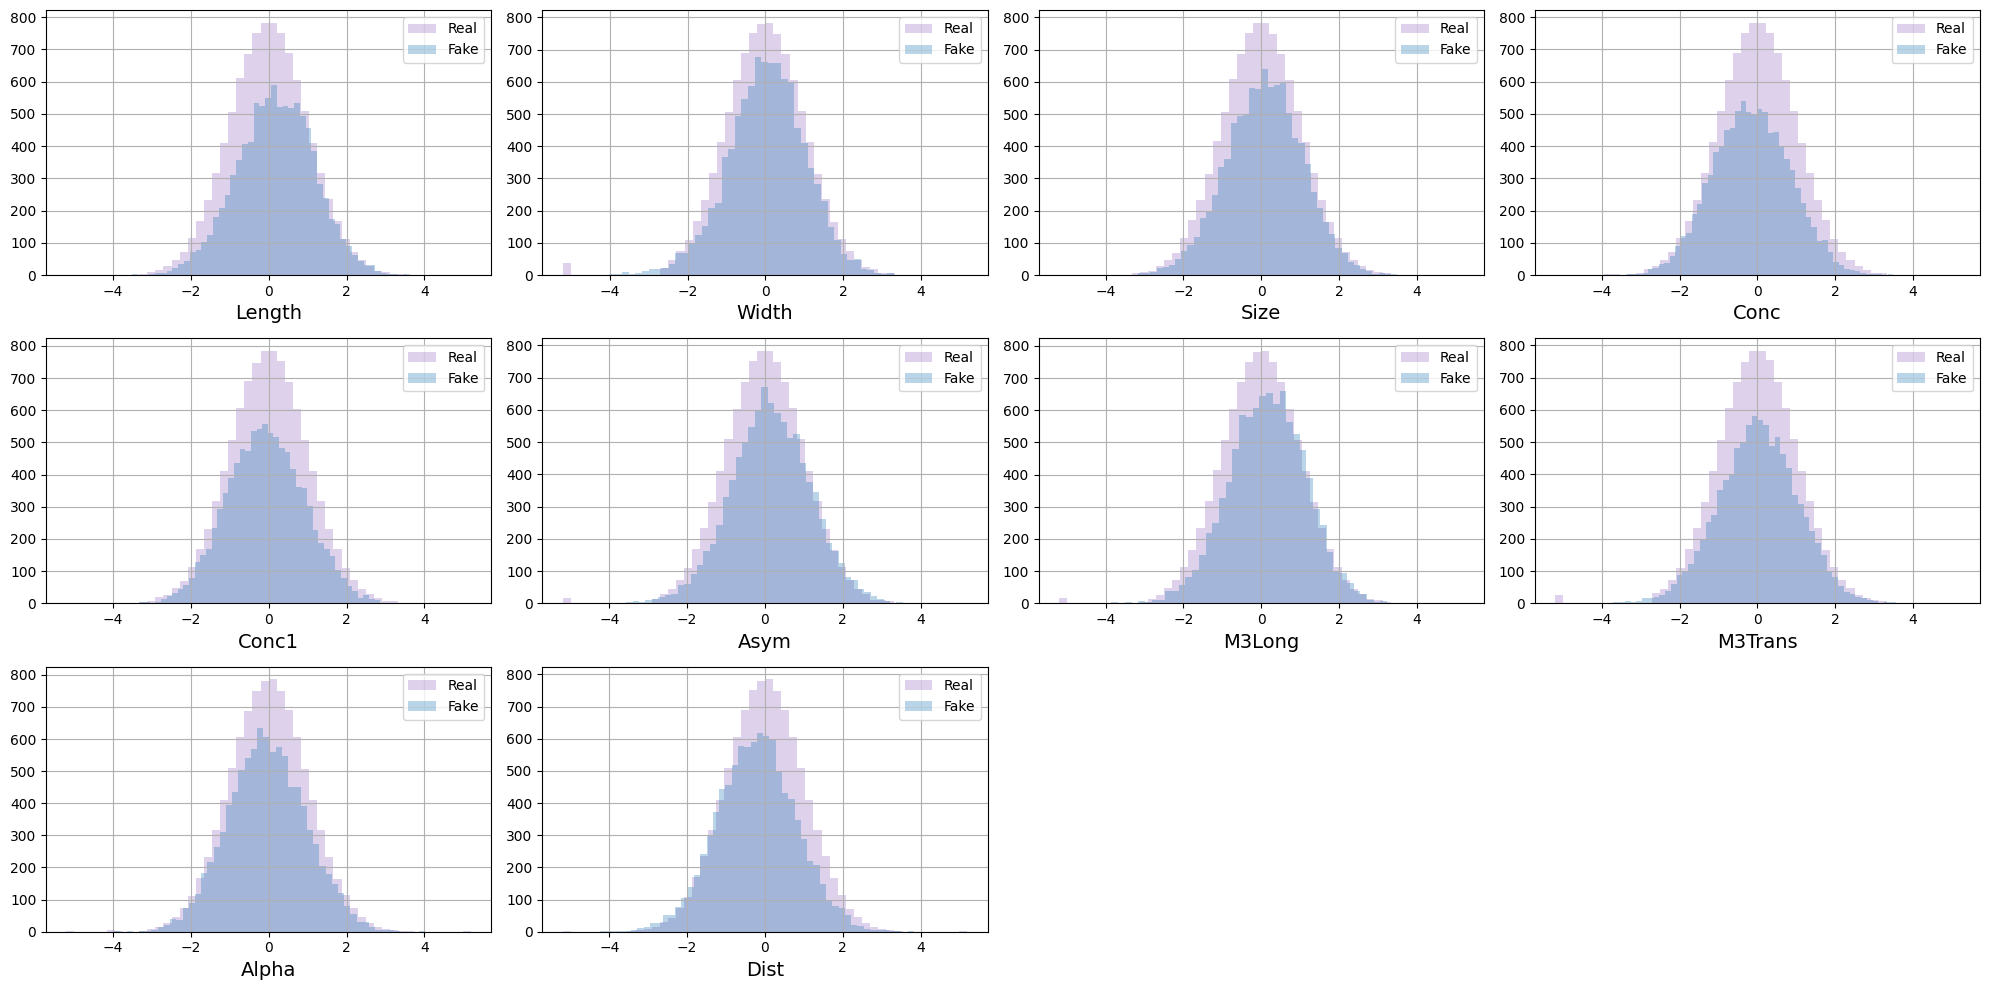

In [221]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

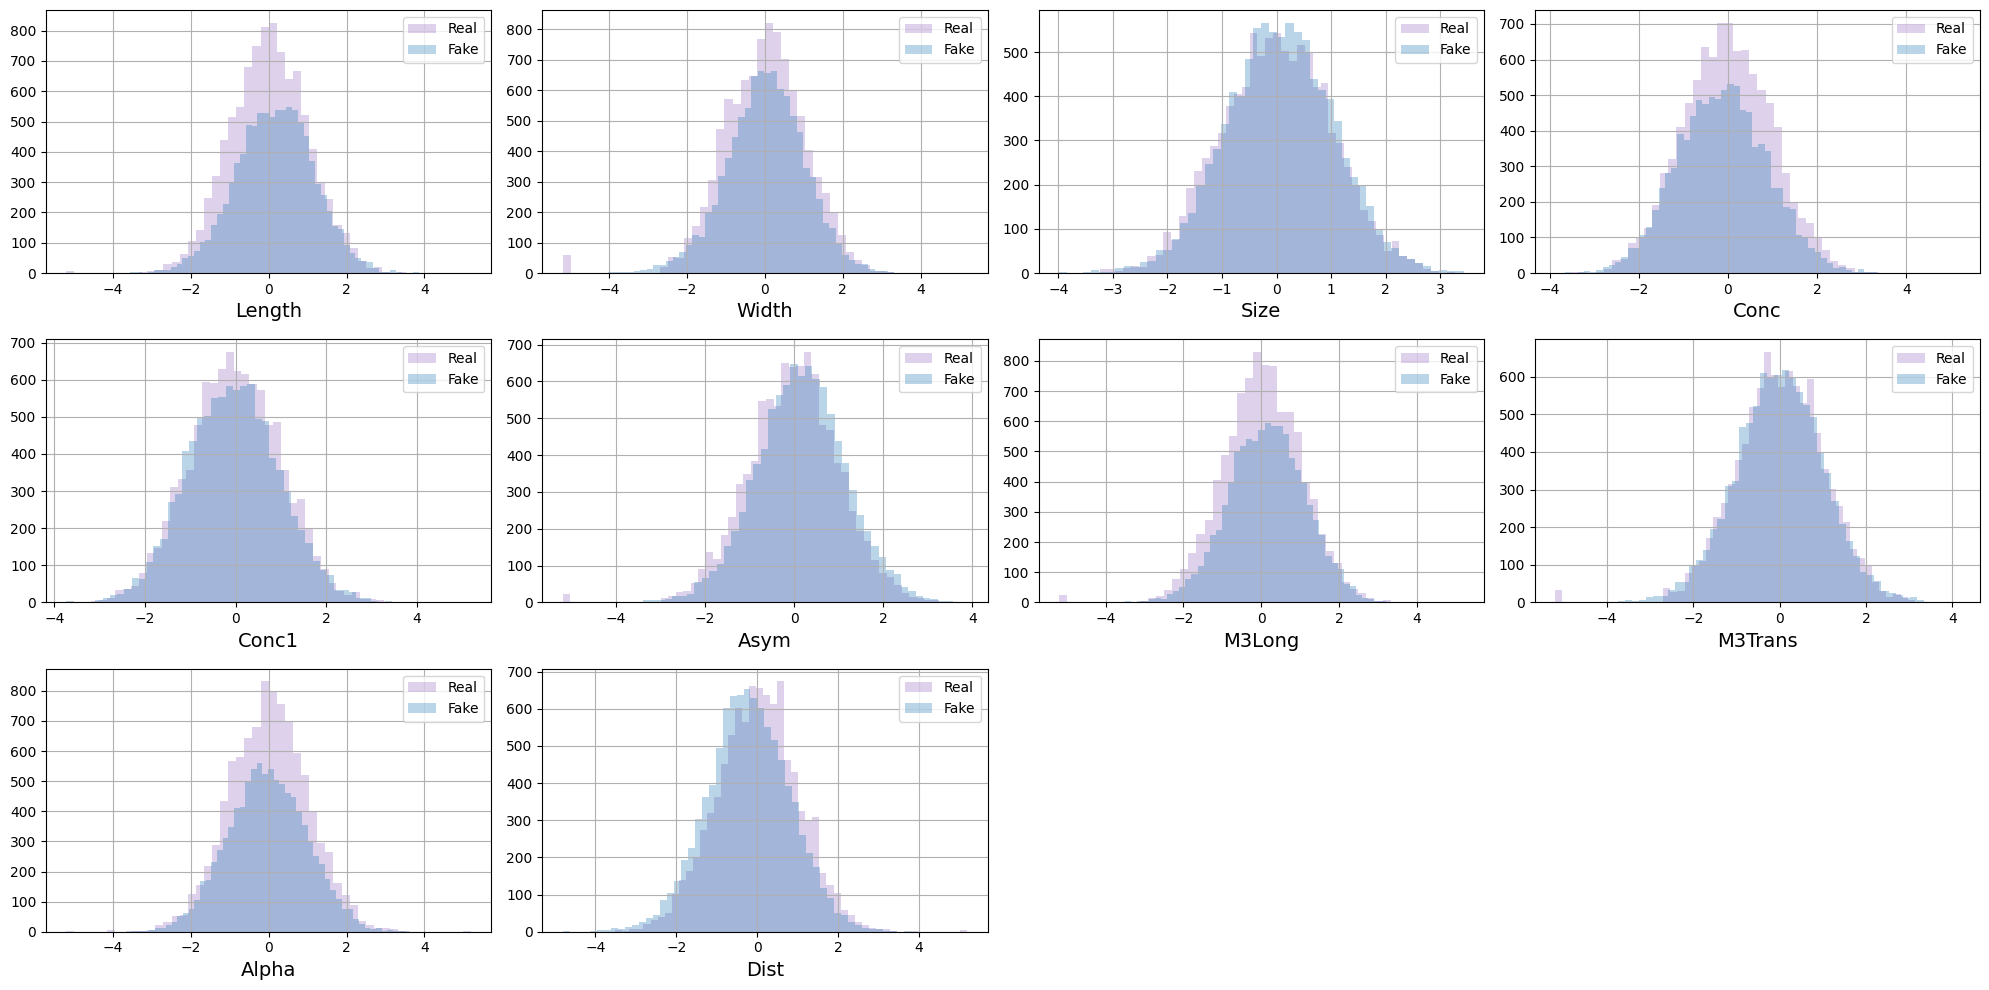

In [222]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

In [223]:
XX_train = np.concatenate((X_fake_train, X_train), axis=0)

XX_test = np.concatenate((X_fake_test, X_test), axis=0)



yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))

yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [224]:
from sklearn.ensemble import GradientBoostingClassifier



# обучаем классификатор

clf = GradientBoostingClassifier()

clf.fit(XX_train, yy_train)



# получаем прогнозы

yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [225]:
from sklearn.metrics import roc_auc_score



auc = roc_auc_score(yy_test, yy_test_proba)

print("ROC AUC = ", auc)

ROC AUC =  0.7348343323370938


# Потоки (4 балла)

## Задание 8 (1.5 балла)



Диффузия показала себя как достойный конкурент GAN модели. Так как данных не много, обучали не долго, задача не сложная - отличия от GAN не так заметны, но все равно достойные.



Для Diffusion получили ROC AUC около 0.73 (меньше лучше). Попробуем обучить RealNVP для решения этой задачи.



**Дополните базовый класс для нормализационного необходимым.**

<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/mem1.jpg?raw=true" width="500"></center>



<center><img src="https://github.com/hushchyn-mikhail/gen_models_ai_hse/blob/main/2024/homeworks/hw3/img/mem2.jpg?raw=true" width="500"></center>

In [170]:
trainloader = torch.utils.data.DataLoader(X_train, batch_size=64, shuffle=True)

In [193]:
# Main class for NormFlow

class NormalizingFlow(nn.Module):



    def __init__(self, layers, prior):

        super(NormalizingFlow, self).__init__()



        # your code below

        self.layers = nn.ModuleList(layers) # слои

        self.prior = prior



    def log_prob(self, x):

        log_likelihood = None



        for layer in self.layers:

            x, change = layer.f(x)

            if log_likelihood is not None:

                log_likelihood += change

            else:

                log_likelihood = change



        log_likelihood = log_likelihood + self.prior.log_prob(x)



        return log_likelihood.mean()



    def sample(self, num_samples):

        x = self.prior.sample((num_samples, ))



        for layer in self.layers[::-1]:

            x = layer.g(x)



        return x

## Задание 9 (2 балла)



Реализуйте нейронную сеть RealNVP. Возьмите для прямого и обратного преобразования нейронную сеть (функцию) со следующими параметрами:



- Полносвязный слой со 100 нейронами;

- ReLU функцию активации;

- Выходной слой.

In [207]:
import torch.nn as nn



class RealNVP(nn.Module):

    def __init__(self, var_size, mask, hidden=100):

        super(RealNVP, self).__init__()

        self.mask = mask  # вам это может не понадобиться. Восприниматйте как подсказку

        self.var_size = var_size



        self.nn_t = nn.Sequential(

            nn.Linear(var_size, hidden),

            nn.ReLU(),

            nn.Linear(hidden, var_size)

        )



        self.nn_s = nn.Sequential(

            nn.Linear(var_size, hidden),

            nn.ReLU(),

            nn.Linear(hidden, var_size)

        )



    def f(self, x):



        x1 = self.mask * x

        x2 = (1 - self.mask) * x



        t = self.nn_t(x1)

        s = torch.tanh(self.nn_s(x1))



        new_x = x1 + (1 - self.mask) * (x2 * torch.exp(s) + t)



        log_det = torch.sum((1 - self.mask) * s, dim=1)



        return new_x, log_det



    def g(self, x):



        x1 = self.mask * x

        x2 = (1 - self.mask) * x



        t = self.nn_t(x1)

        s = torch.tanh(self.nn_s(x1))



        new_x = x1 + (1 - self.mask) * ((x2 - t) * torch.exp(-s))

        return new_x

In [208]:
def train_nf(tr_dataloader, nf, opt, num_epochs):

    nf.train()

    loss_trace = []



    iter_i = 0



    for epoch_i in range(num_epochs):

        print(f'Epoch {epoch_i + 1}')

        for batch in tr_dataloader:



            x = batch.float()



            opt.zero_grad()



            log_prob = nf.log_prob(x)



            loss = -log_prob

            loss.backward()



            opt.step()



            loss_trace.append((iter_i, loss.item()))



            iter_i += 1



In [209]:
prior = torch.distributions.MultivariateNormal(torch.zeros(10), torch.eye(10))



layers = []

for i in range(4):

    layers.append(RealNVP(var_size=10, mask=((torch.arange(10) + i) % 2)))



nf = NormalizingFlow(layers=layers,

                    prior=prior)



opt = torch.optim.Adam(nf.parameters(), lr=1e-3)

In [210]:
train_nf(trainloader, nf, opt, num_epochs=10)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10


## Задание 10 (0.5 балла)



По аналогии с прошлым экспериментом с диффузией сгенерируйте выборку фейковых объектов, равную размеру тестовой выборки, и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с остальными моделями?

In [211]:
# Параметры генерации

num_samples_train = len(X_train)  # Количество фейковых образцов для генерации (такое же, как в реальных данных)

num_samples_test = len(X_test)



# Генерация фейковых данных

X_fake_train = nf.sample(num_samples_train)  # Генерация фейковых данных для обучающей выборки

X_fake_test = nf.sample(num_samples_test)    # Генерация фейковых данных для тестовой выборки



# Объединение фейковых и реальных данных

XX_train = np.concatenate((X_fake_train.detach().numpy(), X_train), axis=0)

XX_test = np.concatenate((X_fake_test.detach().numpy(), X_test), axis=0)



# Подготовка меток

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))  # 0 - фейковые, 1 - реальные

yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))      # 0 - фейковые, 1 - реальные



# Обучение классификатора градиентного бустинга

clf = GradientBoostingClassifier()

clf.fit(XX_train, yy_train)



# Получение прогнозов

yy_test_proba = clf.predict_proba(XX_test)[:, 1]



# Оценка качества генерации с помощью ROC AUC

auc = roc_auc_score(yy_test, yy_test_proba)

print("ROC AUC = ", auc)

ROC AUC =  0.6525700822975649


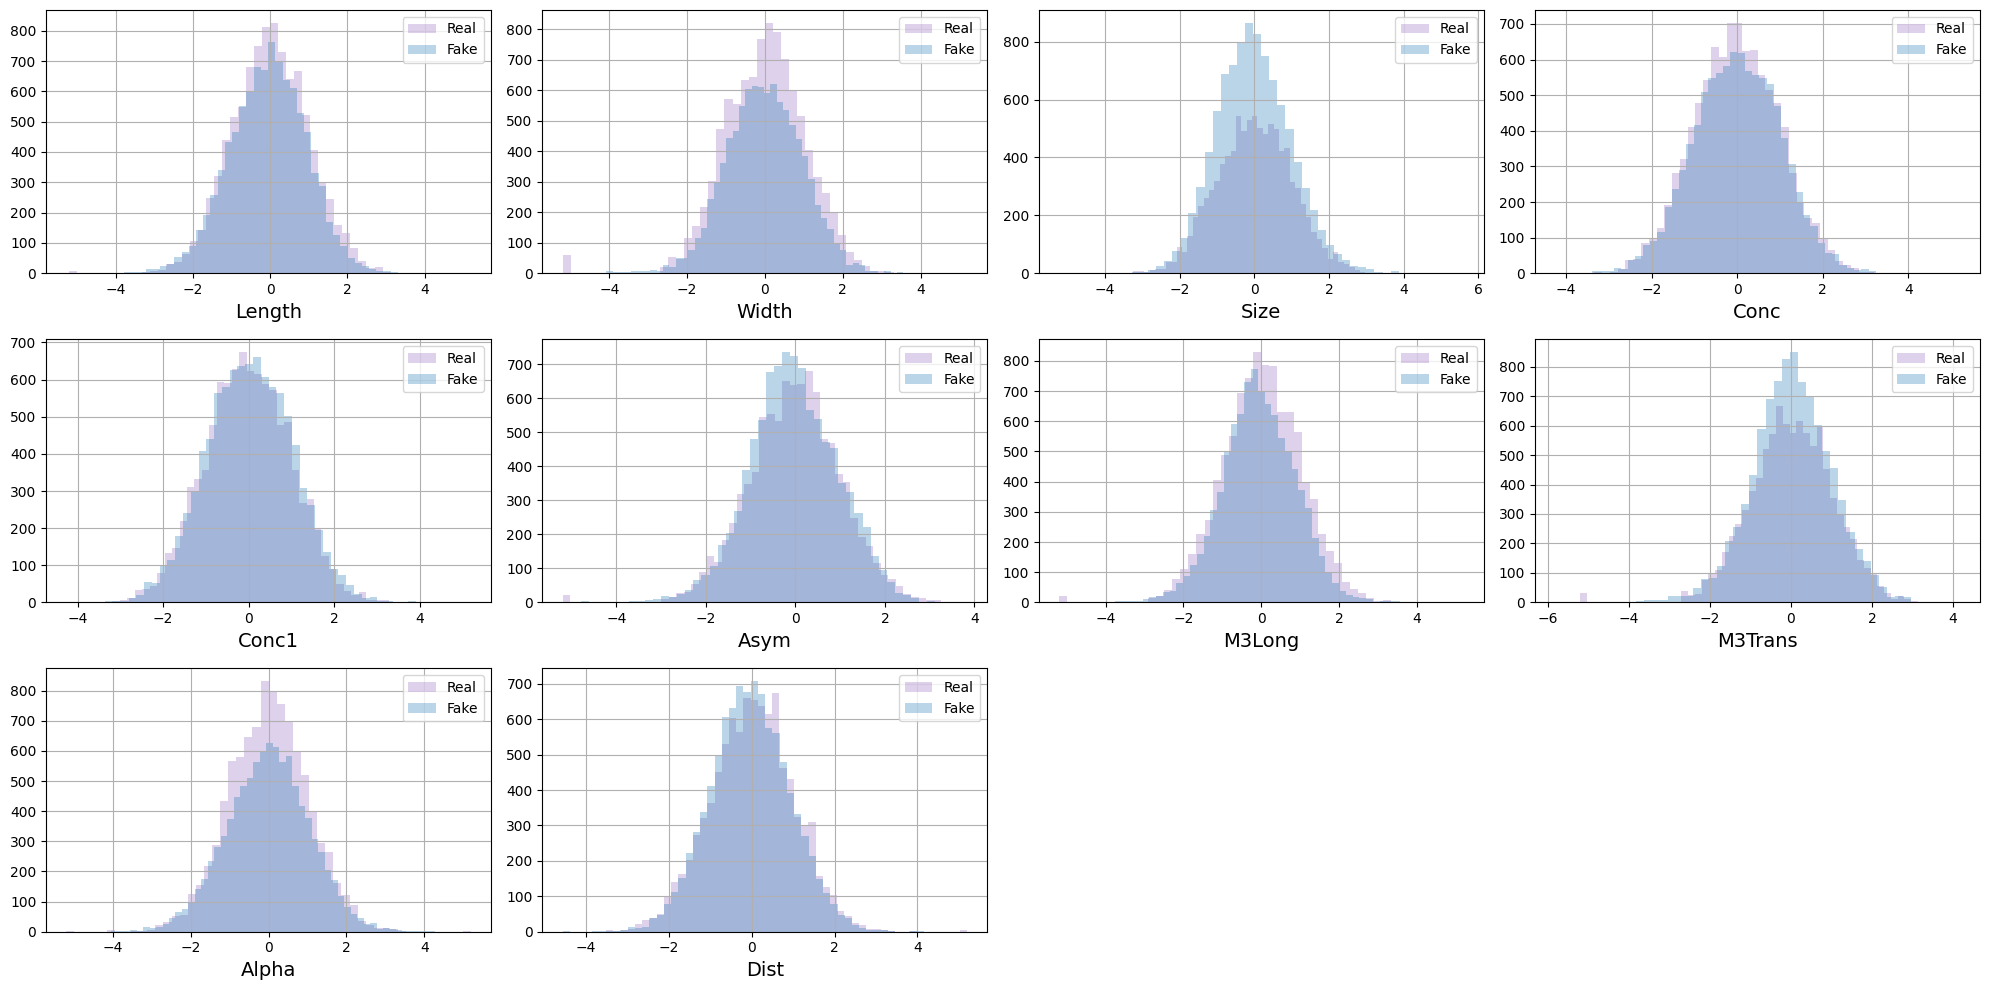

In [213]:
plot_hists(X_test, X_fake_test.detach().numpy(), names, label1="Real", label2="Fake", bins=50)

# Улучшения (1+ балл)



Попробуйте настроить параметры обучения какой-нибудь модели или еще как-нибудь их улучшить, чтобы получить как можно меньший ROC AUC. Что получилось? Какая модель лучше?



Ставим 0.1 балл за каждую сотую скора сверх (сниз) ROC-AUC=0.65 невключительно. Т.е. за 0.65 получаете 0, за 0.649 -- 0.1, 0.639 -- 0.2, 0.609 -- 0.5, 0.559 -- 1

In [ ]:
# your code here


# (*) Аналитика (1 балл)



***Убедительно* подвтердите или опровергните гипотезу "Синтетические данные НЕ помогают лучше классифицировать частицы из исходного датасета."**



Здесь от вас ожидается что-то в духе аналитической записки. Приветствуются графики и прочие "умные вещи". На максимальный балл это весьма объемное задание.